# Calculating the time dependence of the $m_z$-component of magnetic field

Loading programm modules:
- **LinearAlgebra** $-$ mathematical functions;
- **Plots** $-$ drawing graphs;
- **DifferentialEquations** $-$ solving ODEs;
- **BenchmarkTools** $-$ counting working time.

In [1]:
using LinearAlgebra
using Plots
using DifferentialEquations
using BenchmarkTools

Set of input parameters:
- **G** $-$ relation of Josephson energy to energy of magnetic anisotropy;
- **r** $-$ the spin-orbit coupling parameter;
- **alpha** $-$ damping parametr;
- **As** $-$ the amplitude of the pulse current;
- **t_s** $-$ time point the maximal amplitude;
- **delta_t** $-$ current pulse duration;
- **t0** $-$ start of integration time;
- **tf** $-$ end of integration time;
- **nt** $-$ number of points for creation current pulse curve.

In [2]:
G=8
r=0.1
alpha=0.12
As=1.5
t_s=25
delta_t=6
t0=0
tf=100
nt=1000

1000

Create current pulse function and current pulse curve

In [3]:
function I_pulse(t,As,t_s,delta_t)
    I_puls=0
    if (t_s-1/2*delta_t) <= t && t <= (t_s + 1/2*delta_t)
        I_puls=As
    end
    
    return I_puls
end
#arrays for current pulse curve data
y_I=zeros(nt)
t_e=zeros(nt)
# step calculating
step=(tf-t0)/nt
# create range
t_e=range(t0,tf,length=nt)
for i in 1:nt
    y_I[i]=I_pulse(t_e[i],As,t_s,delta_t)
   end

Create right side function with parameters:
- **du** $-$ the desired vector function;
- **u** $-$ input vector of initial values;
- **p** $-$ input vector of static parameters;
- **t** $-$ time range.

In [4]:
function mysfs!(du,u,p,t)
    #"unpacking vectors"
    mx,my,mz,ph=u
    G,r,alpha,As, t_s,delta_t=p

    w=1.0
    #components of effective field
    Hx=0
    Hy=G*r*sin(ph-r*my)
    Hz=mz
    #definition of right-hand sides of equations
    H=[Hx,Hy,Hz]
    M=[mx,my,mz]

    m2=dot(M,M)
    HdM=dot(H,M)

    alpha2= -1/(1+alpha*alpha*m2)
    Iv=I_pulse(t,As,t_s,delta_t)
    du[1] =dmx= alpha2 *((my*Hz-mz*Hy)+ alpha * (mx*HdM-Hx))
    du[2] =dmy= alpha2 *((mz*Hx-mx*Hz)+ alpha * (my*HdM-Hy))
    du[3] =dmz= alpha2 *((mx*Hy-my*Hx)+ alpha * (mz*HdM-Hz))
    du[4] =dph= (r * dmy) - (1/w * sin(ph-r*my)) + (Iv/w)
    
end

mysfs! (generic function with 1 method)

Setting initial conditions, integration interval and static parameters

In [5]:
u0=[0,0,1,0]
tspan = (t0, tf)
params=[G,r,alpha,As, t_s,delta_t]

6-element Vector{Float64}:
  8.0
  0.1
  0.12
  1.5
 25.0
  6.0

Creation ODEProblem object:

In [6]:
prob = ODEProblem(mysfs!,u0,tspan,params);

Solving ODEProblem where:
- **dtmax** $-$ maximum step for the variable step method;
- **reltol** $-$ relative tolerance;
- **abstol** $-$ absolute tolerance.

In [7]:
sol = solve(prob,dtmax=0.1,reltol=1e-8,abstol=1e-8)

retcode: Success
Interpolation: 3rd order Hermite
t: 1028-element Vector{Float64}:
   0.0
   9.999999999999999e-5
   0.0010999999999999998
   0.011099999999999997
   0.11109999999999996
   0.21109999999999995
   0.31109999999999993
   0.4110999999999999
   0.5110999999999999
   0.6110999999999999
   0.7110999999999998
   0.8110999999999998
   0.9110999999999998
   ⋮
  98.90704648590945
  99.00704648590944
  99.10704648590944
  99.20704648590943
  99.30704648590942
  99.40704648590942
  99.50704648590941
  99.60704648590941
  99.7070464859094
  99.8070464859094
  99.90704648590939
 100.0
u: 1028-element Vector{Vector{Float64}}:
 [0.0, 0.0, 1.0, 0.0]
 [0.0, 0.0, 1.0, 0.0]
 [0.0, 0.0, 1.0, 0.0]
 [0.0, 0.0, 1.0, 0.0]
 [0.0, 0.0, 1.0, 0.0]
 [0.0, 0.0, 1.0, 0.0]
 [0.0, 0.0, 1.0, 0.0]
 [0.0, 0.0, 1.0, 0.0]
 [0.0, 0.0, 1.0, 0.0]
 [0.0, 0.0, 1.0, 0.0]
 [0.0, 0.0, 1.0, 0.0]
 [0.0, 0.0, 1.0, 0.0]
 [0.0, 0.0, 1.0, 0.0]
 ⋮
 [0.0009684825907278736, -8.974894878842586e-5, 0.9999995269931871, 6.283176

Plotting results

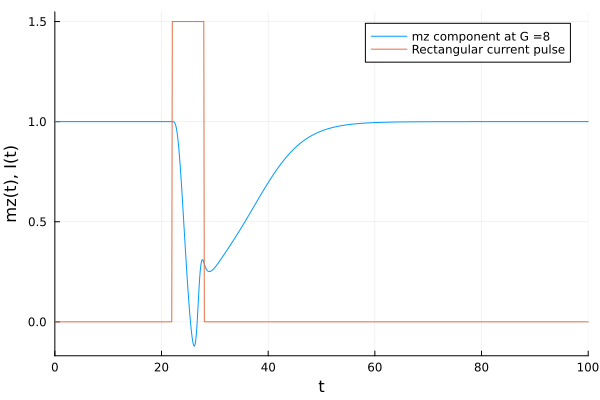

In [8]:
plot(sol[3,:])
plot(sol,idxs=(0,3),ylabel="mz(t), I(t)",label="mz component at G =8")
plot!(t_e,y_I,label="Rectangular current pulse")